<a href="https://colab.research.google.com/github/Gowrish21S/DL_assignment/blob/main/Cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting extraction of /content/cats_and_dogs_filtered.zip...
Extraction complete.

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500

--- Displaying Sample Images ---


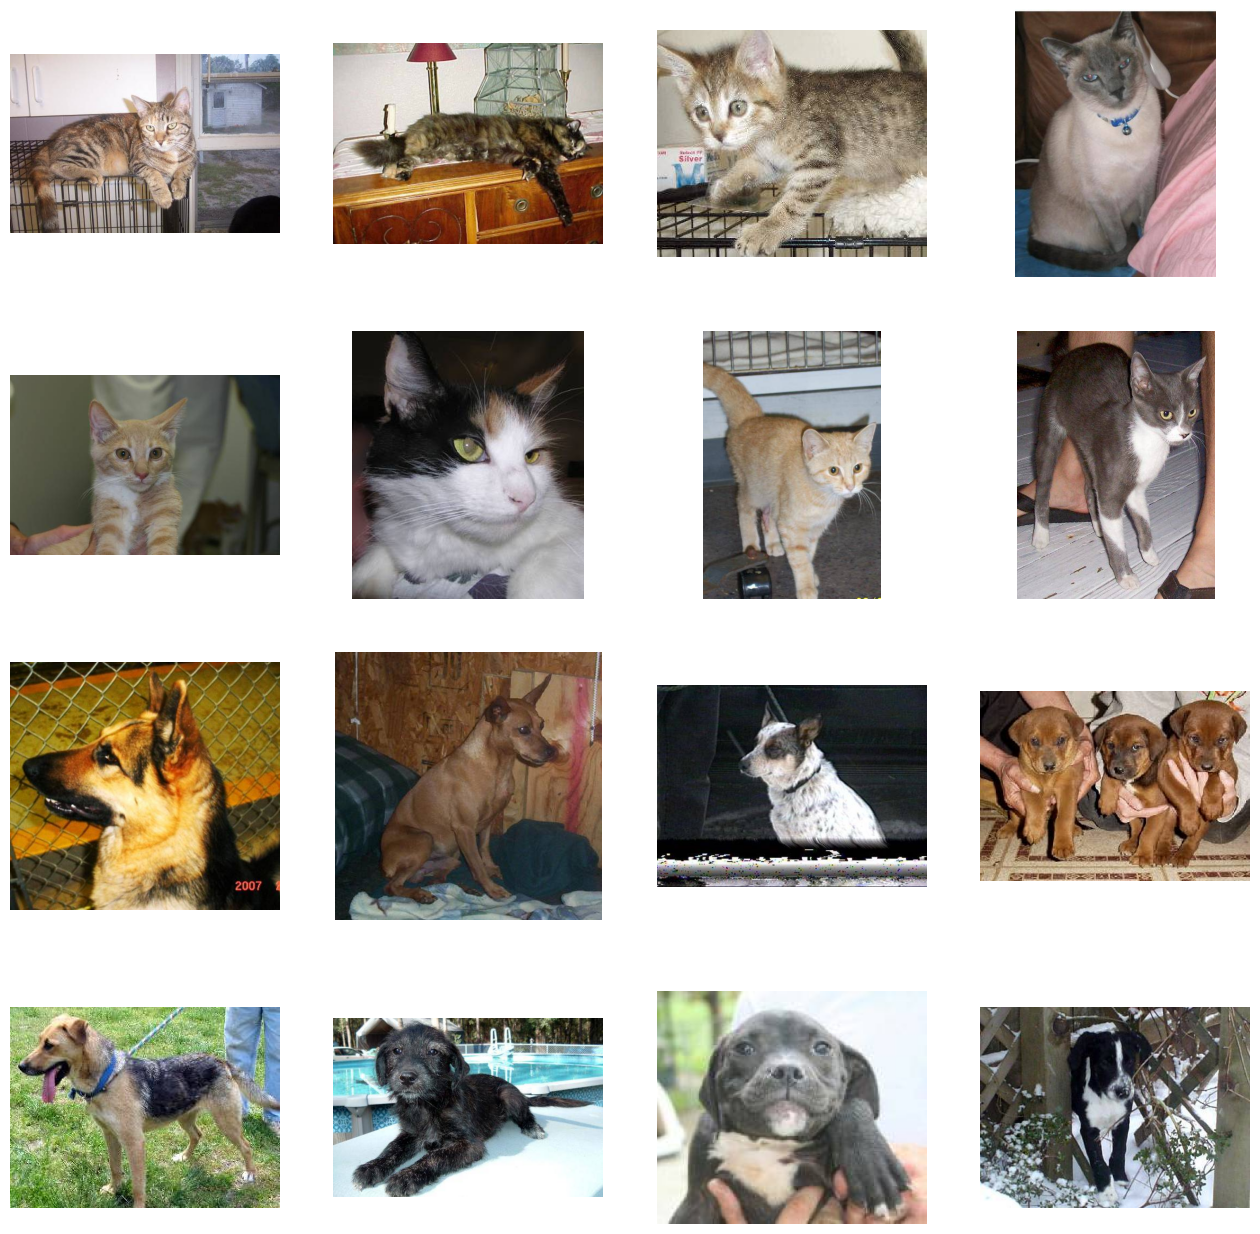

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665,409 (25.43 MB)

 Trainable params: 6,665,409 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

--- Starting Model Training ---
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5057 - loss: 0.7132 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.5030 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.5220 - val_loss: 0.6869
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.5670 - loss: 0.6811 - val_accuracy: 0.5090 - val_loss: 0.7251
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.5818 - loss: 0.6775 - val_accuracy: 0.6110 - val_loss: 0.6532
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.6172 - loss: 0.6600 - val_accuracy: 0.5610 - val_loss: 0.6878
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.6170 - loss: 0.6663 - val_ac

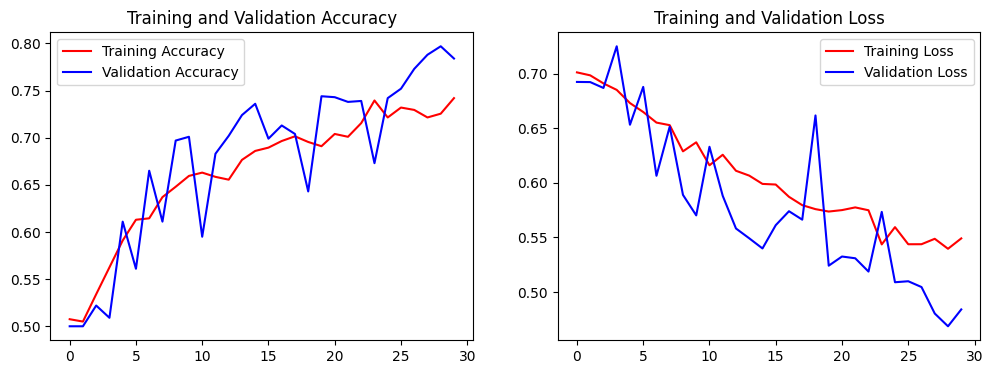


--- Example Prediction ---
Prediction skipped: Test image 'Dalmatian.jpg' not found in /content/. Please upload your test image.

--- Feature Map Visualization ---


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
import os
import zipfile
import shutil
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# ----------------------------------------------------------------------
# 1. Colab File Setup and Extraction
# ----------------------------------------------------------------------
zip_path = '/content/cats_and_dogs_filtered.zip'
base_dir_name = 'cats_and_dogs_filtered'
destination_path = '/content/'
extracted_dir = os.path.join(destination_path, base_dir_name)

# Cleanup and Extraction
if os.path.exists(extracted_dir):
    shutil.rmtree(extracted_dir)

try:
    print(f"Starting extraction of {zip_path}...")
    # Using shell command for fast extraction in Colab
    !unzip -q {zip_path} -d {destination_path}
    print("Extraction complete.")
except Exception as e:
    print(f"ERROR during extraction. Did you upload the file to /content/? Details: {e}")
    # Exit if file not found
    exit()

# Directory setup
base_dir = extracted_dir
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print('\ntotal training cat images :', len(train_cat_fnames))
print('total training dog images :', len(train_dog_fnames))
print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))


# ----------------------------------------------------------------------
# 2. Display Sample Images
# ----------------------------------------------------------------------
print("\n--- Displaying Sample Images ---")
nrows = 4
ncols = 4
pic_index = 8

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


# ----------------------------------------------------------------------
# 3. Modified Model Architecture (Deeper and Regularized)
# ----------------------------------------------------------------------
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # New layer added

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # Dropout for regularization
    tf.keras.layers.Dense(1024, activation='relu'), # Increased units
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

model.summary()

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), # Use learning_rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


# ----------------------------------------------------------------------
# 4. Data Augmentation and Generators
# ----------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.) # No augmentation for test/validation

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150, 150))

# ----------------------------------------------------------------------
# 5. Model Training (Fit)
# ----------------------------------------------------------------------
print("\n--- Starting Model Training ---")
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=30, # Increased epochs
                    validation_steps=50,
                    verbose=1)


# ----------------------------------------------------------------------
# 6. Plot Training History (Accuracy and Loss Curves)
# ----------------------------------------------------------------------
print("\n--- Plotting Training History ---")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


# ----------------------------------------------------------------------
# 7. Model Prediction (Example)
# ----------------------------------------------------------------------
print("\n--- Example Prediction ---")

# NOTE: The file path for the test image must be corrected for Colab!
# Assuming you upload a test image (e.g., 'test_image.jpg') to /content/
# You will need to upload your test files (e.g., Dalmatian.jpg) to /content/
fn = "Dalmatian.jpg" # Example file name
path = '/content/' + fn # Corrected Colab path

try:
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x]) / 255.0 # Rescale the prediction image!

    classes = model.predict(images, batch_size=10)

    print(f"Prediction for {fn}: {classes[0]}")

    plt.imshow(img)
    plt.title(f"Prediction: {'Dog' if classes[0] > 0.5 else 'Cat'}")
    plt.axis('off')
    plt.show()

    if classes[0] > 0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

except FileNotFoundError:
    print(f"Prediction skipped: Test image '{fn}' not found in /content/. Please upload your test image.")


# ----------------------------------------------------------------------
# 8. Feature Map Visualization
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
# 8. Feature Map Visualization (FIXED)
# ----------------------------------------------------------------------
print("\n--- Feature Map Visualization ---")

# Step 1: Ensure the model is built (which it is after model.fit)
# model.build(input_shape=(None, 150, 150, 3)) # Redundant after model.fit, but safe if you moved this code.

# Only select layers that produce feature maps we want to visualize (Conv and Pool layers)
successive_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name or 'max_pooling2d' in layer.name]

# FIX: Access the input tensor of the first layer (model.layers[0].input)
# This explicitly references the input tensor, avoiding the AttributeError.
visualization_model = tf.keras.models.Model(inputs = model.layers[0].input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255.0 # Rescale input for prediction

successive_feature_maps = visualization_model.predict(x)

# Filter the layer names list to match the layers used for successive_outputs
layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name or 'max_pooling2d' in layer.name]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]

        # Display only up to 16 features for readability
        n_cols = min(16, n_features)

        display_grid = np.zeros((size * 4, size * (n_cols // 4))) # Use 4x4 grid max for display

        # Tile images into a square grid
        for i in range(n_cols):
            x_fm = feature_map[0, :, :, i]

            # Postprocess the feature map for visual clarity
            x_fm -= x_fm.mean()
            x_fm /= x_fm.std() + 1e-5
            x_fm *= 64
            x_fm += 128
            x_fm = np.clip(x_fm, 0, 255).astype('uint8')

            # Place the processed feature map in the grid
            row = i % 4
            col = i // 4

            display_grid[row * size : (row + 1) * size, col * size : (col + 1) * size] = x_fm

        # Display the grid
        scale = 1.0
        plt.figure(figsize=(scale * n_cols / 4, scale * 4))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

print("Feature Map Visualization complete.")

print("Execution complete.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


--- Feature Map Visualization ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


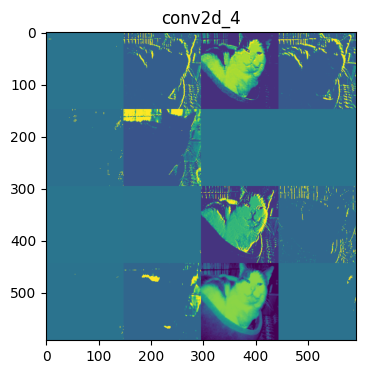

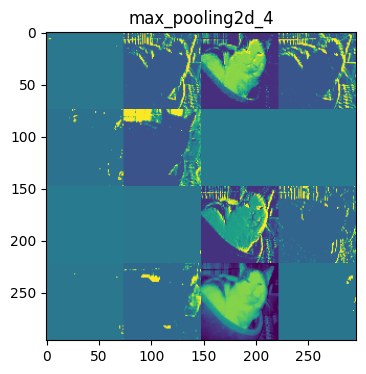

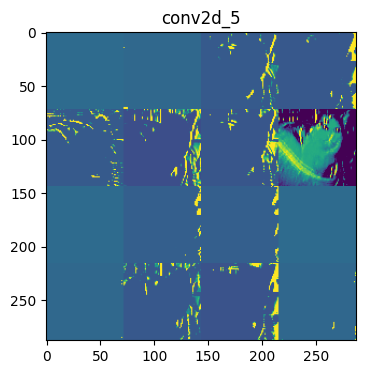

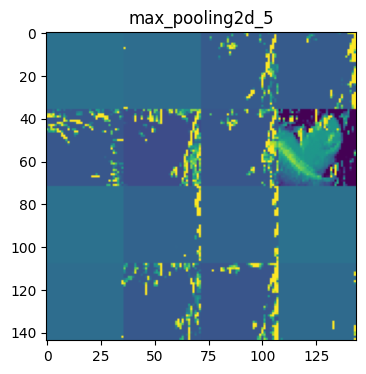

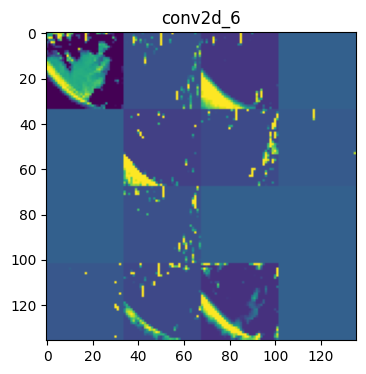

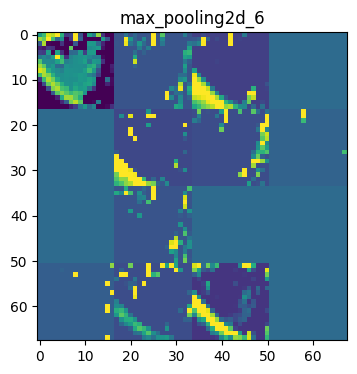

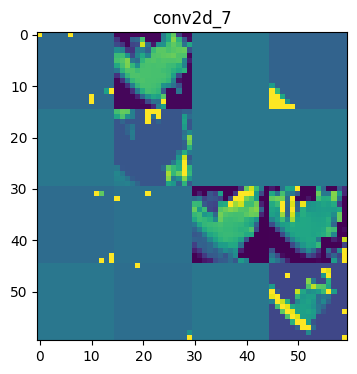

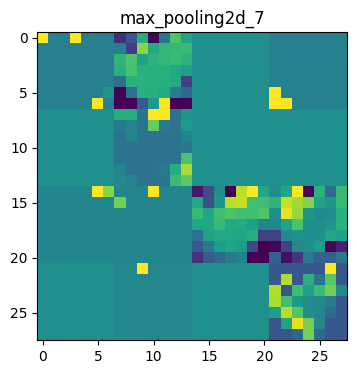

Feature Map Visualization complete.


In [ ]:
# ----------------------------------------------------------------------
# 8. Feature Map Visualization (FIXED)
# ----------------------------------------------------------------------
print("\n--- Feature Map Visualization ---")

# Step 1: Ensure the model is built (which it is after model.fit)
# model.build(input_shape=(None, 150, 150, 3)) # Redundant after model.fit, but safe if you moved this code.

# Only select layers that produce feature maps we want to visualize (Conv and Pool layers)
successive_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name or 'max_pooling2d' in layer.name]

# FIX: Access the input tensor of the first layer (model.layers[0].input)
# This explicitly references the input tensor, avoiding the AttributeError.
visualization_model = tf.keras.models.Model(inputs = model.layers[0].input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255.0 # Rescale input for prediction

successive_feature_maps = visualization_model.predict(x)

# Filter the layer names list to match the layers used for successive_outputs
layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name or 'max_pooling2d' in layer.name]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]

        # Display only up to 16 features for readability
        n_cols = min(16, n_features)

        display_grid = np.zeros((size * 4, size * (n_cols // 4))) # Use 4x4 grid max for display

        # Tile images into a square grid
        for i in range(n_cols):
            x_fm = feature_map[0, :, :, i]

            # Postprocess the feature map for visual clarity
            x_fm -= x_fm.mean()
            x_fm /= x_fm.std() + 1e-5
            x_fm *= 64
            x_fm += 128
            x_fm = np.clip(x_fm, 0, 255).astype('uint8')

            # Place the processed feature map in the grid
            row = i % 4
            col = i // 4

            display_grid[row * size : (row + 1) * size, col * size : (col + 1) * size] = x_fm

        # Display the grid
        scale = 1.0
        plt.figure(figsize=(scale * n_cols / 4, scale * 4))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

print("Feature Map Visualization complete.")